In [23]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from skimage import io, morphology, img_as_bool, segmentation
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_fill_holes

%matplotlib inline

In [64]:
def pad_resize(img):
    top = int((224 - img.shape[0])/2)
    left = int((224 - img.shape[1])/2)
    bottom = 224 - img.shape[0] - top
    right = 224 - img.shape[1] - left
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
    img = img/255.
    img = cv2.resize(img, (64,64)) #KADD
    return img

def skeletonize(img):
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    img = cv2.bitwise_not(img)
#     element = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
#     done = 0
#     while( done < 1 ):
#         eroded = cv2.erode(img,element)
#         temp = cv2.dilate(eroded,element)
#         temp = cv2.subtract(img,temp)
#         skel = cv2.bitwise_or(skel,temp)
#         img = eroded.copy()

#         zeros = size - cv2.countNonZero(img)
#         if zeros==size:#cv2.countNonZero(img) * 1 >= 0:#
#             done += 1
#     img = skel
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 2)
    img = cv2.bitwise_not(erosion)
    return img

In [146]:
PATH = '../train_images_modified'
images = []
base_class = []
matra_class = []
dot_class = []
total_class = []
for filename in os.listdir(PATH):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(PATH,filename),0)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        a,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
#         plt.imshow(img, cmap='gray')
#         plt.show()
# #         kernel = np.ones((5,5),np.uint8)
#         img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#         plt.imshow(img, cmap='gray')
#         plt.show()
        #img = skeletonize(img)
        img = pad_resize(img)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        char_arr = filename[:-4].split('_')[3:]
        if(len(char_arr)>0):
            images.append(img)
            char_arr = [int(i) for i in char_arr]
            total_class.append(char_arr)
            base = [i for i in char_arr if (i>=2308 and i<=2361) or (i==2384) or (i>=2392 and i<=2401) or (i>=2404 and i!=2416 and i!=2417)]  
            base_class.append(base[0])
            dot = [i for i in char_arr if i in [2416,2417]]
            if(len(dot)>0):
                dot_class.append(dot[0])
            else:
                dot_class.append(0)
            matra = [i for i in char_arr if (i>=2304 and i<=2307) or (i>=2362 and i<=2380) or (i>=2382 and i<=2383) or (i>=2385 and i<=2391) or (i>=2402 and i<=2403)]
            if(len(matra)>0):
                matra_class.append(matra[0])
            else:
                matra_class.append(0)
#             if(len(char_arr)>1):          
#                 matra_class.append(char_arr[1:])
            if len(images)%100==0:
                print("{} Done".format(len(images)))
            
# print(len(images))
# print(len(char_class))
# print(images[0])
# print(char_class[0])

100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done


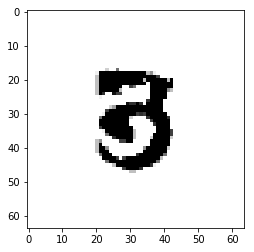

1895


In [147]:
plt.imshow(images[100],"gray")
plt.show()
print(len(images))

In [148]:
len(set(base_class))

53

In [149]:
matra_class

[2368,
 2306,
 0,
 0,
 0,
 0,
 2366,
 0,
 2366,
 0,
 2376,
 2367,
 0,
 0,
 0,
 0,
 2370,
 2375,
 2375,
 0,
 2367,
 0,
 2367,
 0,
 0,
 0,
 0,
 2376,
 0,
 2366,
 2375,
 0,
 2380,
 2366,
 0,
 2366,
 0,
 2366,
 2379,
 2375,
 2376,
 2367,
 0,
 0,
 0,
 0,
 2380,
 2367,
 0,
 0,
 2380,
 0,
 0,
 2306,
 0,
 0,
 2380,
 0,
 2380,
 0,
 0,
 0,
 0,
 2367,
 2368,
 0,
 0,
 0,
 0,
 2376,
 0,
 0,
 2366,
 0,
 0,
 2375,
 2366,
 2370,
 2368,
 0,
 2370,
 2367,
 0,
 2366,
 0,
 0,
 0,
 2306,
 2367,
 2366,
 0,
 2375,
 2366,
 0,
 0,
 2306,
 2306,
 0,
 0,
 0,
 0,
 2379,
 2376,
 2368,
 0,
 2379,
 2368,
 2367,
 2368,
 0,
 0,
 0,
 0,
 0,
 0,
 2366,
 0,
 2367,
 2306,
 2369,
 2366,
 2368,
 2376,
 2366,
 2370,
 2370,
 2363,
 0,
 0,
 2366,
 2368,
 0,
 0,
 2366,
 0,
 0,
 0,
 2369,
 0,
 0,
 2367,
 0,
 0,
 0,
 2366,
 0,
 0,
 0,
 0,
 2367,
 2367,
 2366,
 0,
 2366,
 2366,
 0,
 2366,
 2379,
 0,
 2366,
 0,
 2366,
 2366,
 2367,
 2366,
 2368,
 2366,
 2366,
 0,
 0,
 2375,
 2375,
 2306,
 2367,
 2366,
 0,
 2375,
 2366,
 0,
 0,
 0,


In [69]:
images = np.array(images)
X = np.reshape(np.array(images), (-1, 64*64))
y = np.array(base_class)

df = pd.DataFrame(X, y)
df['LABEL'] = df.index

df_no_label = df.drop(columns='LABEL')

In [70]:
df_no_label.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2360,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [71]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
le.fit(base_class)
y_labeled = le.transform(base_class)
y_train = np_utils.to_categorical(y_labeled)

In [74]:
print(y_train.shape)
X_train = np.reshape(images,(-1,64,64,1))
print(X_train.shape)

(1895, 53)
(1895, 64, 64, 1)


In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,LABEL
2325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2325
2350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2350
2347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2347
2360,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2360
2312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2312


# Consonant Class

In [181]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(2,2),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(base_class)),activation = 'softmax'))

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 63, 63, 16)        80        
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 62, 62, 32)        2080      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 30, 30, 16)        2064      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 29, 29, 32)        2080      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 13, 13, 64)        8256      
__________

In [183]:
import keras.backend as K

def f1_score(theta):
    def score(y_true, y_pred):

        y_thresh = K.cast(K.greater(y_pred,theta),K.floatx())

        true_pos =  K.sum(y_true * y_thresh)
        false_pos = K.sum(y_true * (1. - y_thresh))
        false_neg = K.sum((1. - y_true) * y_thresh)

        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        
        f1_score_val = 2 * (precision * recall) / (precision + recall)
        return f1_score_val
    return score

def custom_metric(y_true, y_pred):
    return K.cast(K.equal(y_true,
                          K.round(y_pred)),
                  K.floatx())

In [184]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [185]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='consonantweights.best.hdf5', verbose=1, save_best_only=True)

In [186]:
model.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 13s 9ms/step - loss: 3.6601 - score: nan - categorical_accuracy: 0.0686 - val_loss: 3.3715 - val_score: nan - val_categorical_accuracy: 0.0914
Epoch 2/30
1326/1326 [==============================] - 12s 9ms/step - loss: 3.4214 - score: nan - categorical_accuracy: 0.0973 - val_loss: 3.2456 - val_score: nan - val_categorical_accuracy: 0.1476
Epoch 3/30
1326/1326 [==============================] - 12s 9ms/step - loss: 3.1511 - score: nan - categorical_accuracy: 0.1780 - val_loss: 2.8888 - val_score: nan - val_categorical_accuracy: 0.2039
Epoch 4/30
1326/1326 [==============================] - 12s 9ms/step - loss: 2.6701 - score: nan - categorical_accuracy: 0.3092 - val_loss: 2.3666 - val_score: nan - val_categorical_accuracy: 0.3726
Epoch 5/30
1326/1326 [==============================] - 12s 9ms/step - loss: 2.2681 - score: 0.2560 - categorical_accuracy: 0.4148 - val_loss: 2.1950 - val_s

# Matra Class

In [187]:
y_matra = np.array(matra_class)

In [188]:
le_matra = LabelEncoder()
le_matra.fit(matra_class)
y_matra_labeled = le_matra.transform(matra_class)
y_matra_train = np_utils.to_categorical(y_matra_labeled)

In [189]:
len(y_matra_train[0])

18

In [193]:
model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(2,2),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(len(set(matra_class)),activation = 'softmax'))

In [194]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [196]:
model.fit(X_train,y_matra_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 12s 9ms/step - loss: 1.3075 - score: 0.5950 - categorical_accuracy: 0.6214 - val_loss: 0.9611 - val_score: 0.6733 - val_categorical_accuracy: 0.7153
Epoch 2/30
1326/1326 [==============================] - 12s 9ms/step - loss: 0.9681 - score: 0.7049 - categorical_accuracy: 0.7112 - val_loss: 0.8561 - val_score: 0.7063 - val_categorical_accuracy: 0.7469
Epoch 3/30
1326/1326 [==============================] - 12s 9ms/step - loss: 0.8159 - score: 0.7419 - categorical_accuracy: 0.7572 - val_loss: 0.6918 - val_score: 0.7869 - val_categorical_accuracy: 0.7838
Epoch 4/30
1326/1326 [==============================] - 12s 9ms/step - loss: 0.6878 - score: 0.7803 - categorical_accuracy: 0.7949 - val_loss: 0.6331 - val_score: 0.7858 - val_categorical_accuracy: 0.7996
Epoch 5/30
1326/1326 [==============================] - 12s 9ms/step - loss: 0.5663 - score: 0.8183 - categorical_accuracy: 0.8318 - 

# Dot Class

In [132]:
y_dot = np.array(dot_class)

In [135]:
le_dot = LabelEncoder()
le_dot.fit(dot_class)
y_dot_labeled = le_dot.transform(dot_class)
y_dot_train = np_utils.to_categorical(y_dot_labeled)

In [137]:
len(y_dot_train[0])

3

In [138]:
model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(len(set(dot_class)),activation = 'softmax'))

In [139]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [141]:
model.fit(X_train,y_dot_train,epochs=3,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/20
1326/1326 [==============================] - 21s 16ms/step - loss: 0.1880 - score: 0.9612 - categorical_accuracy: 0.9668 - val_loss: 0.1383 - val_score: 0.9772 - val_categorical_accuracy: 0.9772
Epoch 2/20
1326/1326 [==============================] - 20s 15ms/step - loss: 0.1060 - score: 0.9834 - categorical_accuracy: 0.9834 - val_loss: 0.1286 - val_score: 0.9772 - val_categorical_accuracy: 0.9772
Epoch 3/20
1326/1326 [==============================] - 20s 15ms/step - loss: 0.1073 - score: 0.9834 - categorical_accuracy: 0.9834 - val_loss: 0.1299 - val_score: 0.9772 - val_categorical_accuracy: 0.9772
Epoch 4/20
1326/1326 [==============================] - 20s 15ms/step - loss: 0.1018 - score: 0.9834 - categorical_accuracy: 0.9834 - val_loss: 0.1452 - val_score: 0.9772 - val_categorical_accuracy: 0.9772
Epoch 5/20
1326/1326 [==============================] - 20s 15ms/step - loss: 0.0877 - score: 0.9834 - categorical_accuracy: 0.98

KeyboardInterrupt: 